* 퍼셉트론의 좋은 점 : 복잡한 함수도 표현 가능
* 퍼셉트론의 안 좋은 점 : 가중치 설정을 사람이 수동
* ==> 신경망은 이 안 좋은 점을 해결

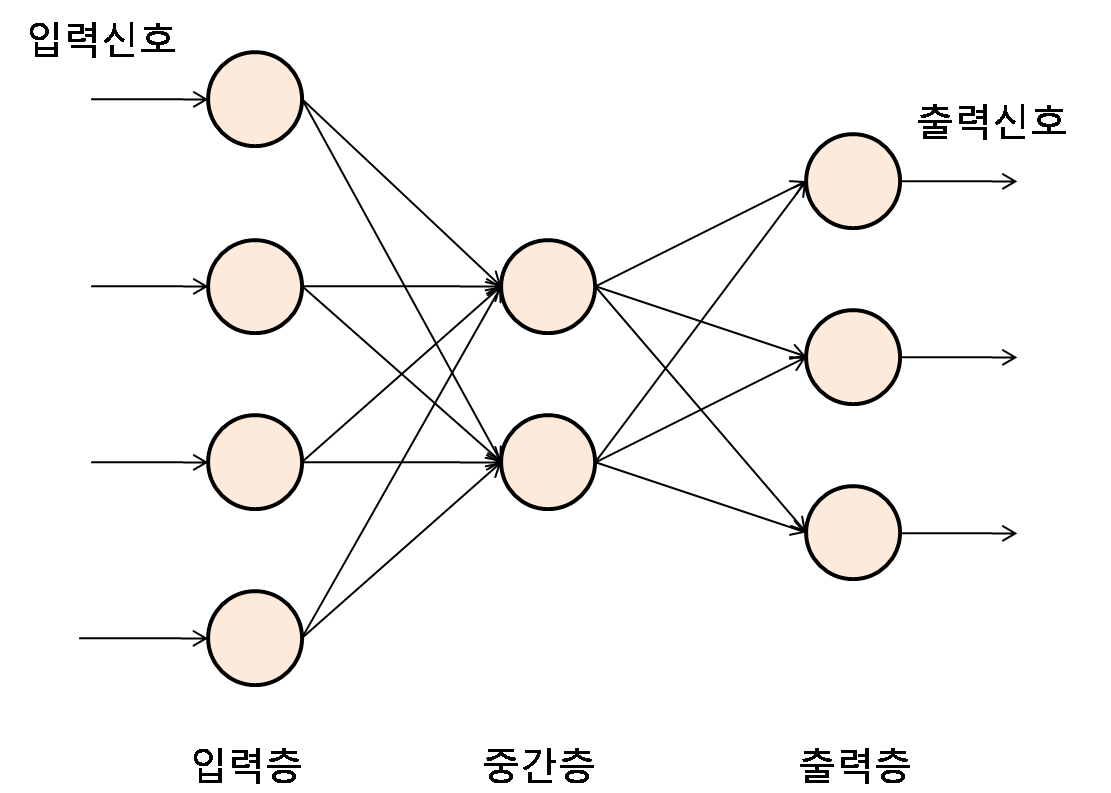

#### 활성화 함수(activation function) - h(x)의 등장


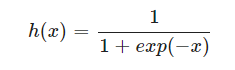

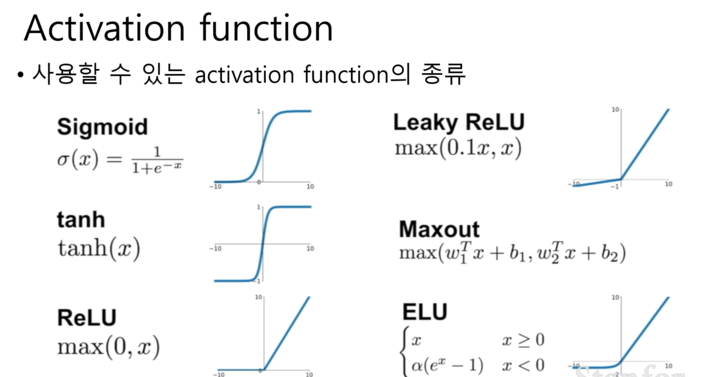

In [2]:
import math
1/(1+math.exp(-1.0))

0.7310585786300049

In [3]:
1/(1+math.exp(-2.0))

0.8807970779778823

#### 계단 함수 구현하기

In [4]:
def step_func(x):
    if x > 0:
        return 1
    else:
        return 0

In [5]:
step_func(3.0)

1

In [6]:
step_func(-3.0)

0

위 구현은 실수(부동소수점)만 받아들임.--> 넘파이 배열 넣을 수 없음

In [7]:
import numpy as np
def step_func(x):
    y = x > 0
    return y.astype(np.int)

In [9]:
x = np.array([-0.1, 1.0, 2.0])
y = x > 0
y

array([False,  True,  True])

In [11]:
import warnings
warnings.filterwarnings(action='ignore')
y = y.astype(np.int)
y

array([0, 1, 1])

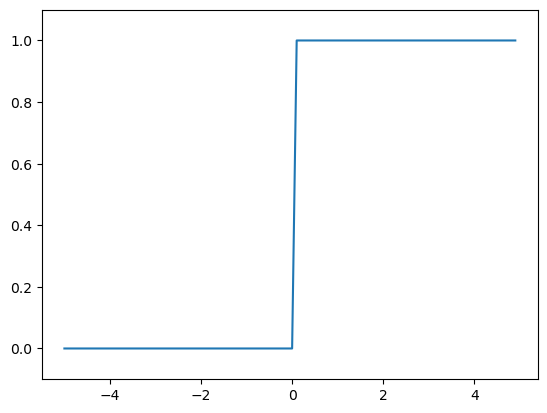

In [15]:
import matplotlib.pyplot as plt

def step_func(x):
    return np.array(x > 0, dtype = np.int64)

x = np.arange(-5.0, 5.0, 0.1)
y = step_func(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)    # y축의 범위지정
plt.show()

#### 시그모이드 함수

In [16]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [17]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

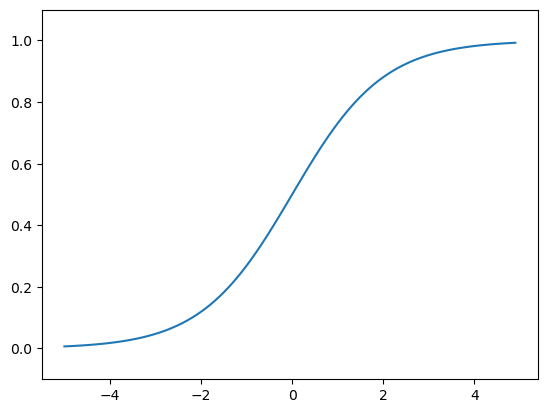

In [18]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1)  # y축의 범위지정
plt.show()

#### 시그모이드 함수와 계단 함수 비교

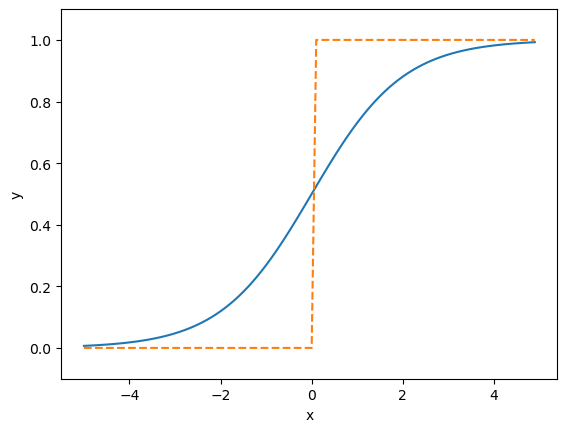

In [19]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x)
y2 = step_func(x)

plt.plot(x, y1, label = 'sigmoid')
plt.plot(x, y2, linestyle = '--', label = 'step_func')
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-0.1, 1.1)

plt.show()

* 계단 함수는 0을 경계로 출력이 갑자기 바뀜

* 시그모이드 함수의 매끈함이 신경망 학습에서 아주 중요한 역할을 하게 됩니다.

* 퍼셉트론에서는 뉴론 사이에서 0 혹은 1이 흘렀다면 신경망에서는 연속적인 실수가 흐른다

* 둘의 공통점은:
    - 입력이 중요하면 큰값을 출력하고 입력이 중요하지 않으면 작은 값을 출력
    - 출력은 0 에서 1사이

#### 비선형 함수
계단 함수와 시그모이드 함수 모두 비선형 함수

선형함수: 출력이 입력의 상수배만큼 변하는 함수. f(x) = ax + b

비선형함수: 선형이 아닌 함수.

선형함수의 문제는 '은닉층이 없는 네트워크'로 똑같은 기능을 할 수 있음.

층을 쌓는 혜택을 얻고 싶다면 활성화 함수로 반드시 비선형함수를 사용해야 함.

***

### ReLU
ReLU(Rectified Linear Unit)S는 입력이 0을 넘으면 그 입력을 그대로 출력하고, 0 이하면 0을 출력하는 함수이다

In [20]:
def relu(x):
    return np.maximum(0,x)

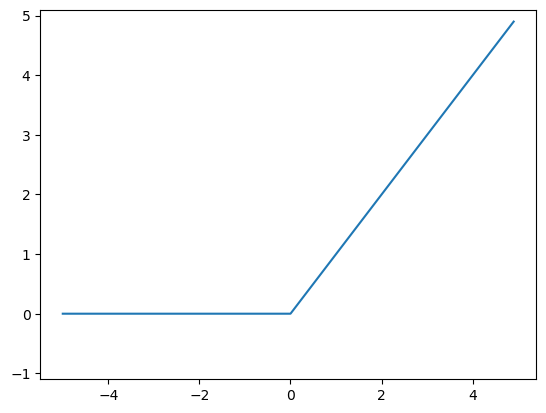

In [21]:
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-1.1, 5.1)
plt.show()

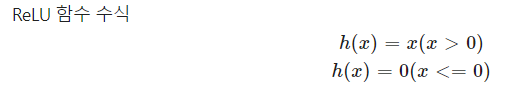

#### 다차원 배열의 계산

In [22]:
A = np.array([1,2,3,4])
print(A)
print(np.ndim(A))
print(A.shape)
print(A.shape[0])

[1 2 3 4]
1
(4,)
4


In [23]:
B = np.array([[1, 2], [3, 4], [5, 6]])
print(B)
print(np.ndim(B))
print(B.shape)

[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)


In [24]:
A = np.array([[1, 2], [3, 4]])
print(A.shape)
B = np.array([[5, 6], [7, 8]])
print(B.shape)
np.dot(A, B)

(2, 2)
(2, 2)


array([[19, 22],
       [43, 50]])

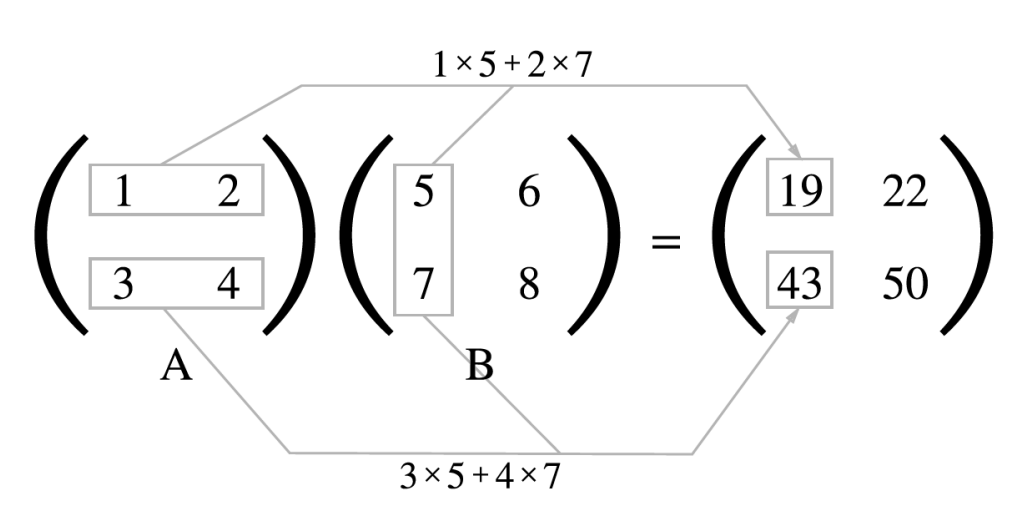

In [25]:
A = np.array([[1, 2, 3], [4, 5, 6]])
print(A.shape)
B = np.array([[1, 2], [3, 4], [5, 6]])
print(B.shape)
np.dot(A, B)

(2, 3)
(3, 2)


array([[22, 28],
       [49, 64]])

In [26]:
A = np.array([[1, 2], [3, 4], [5, 6]])
print(A.shape)
B = np.array([7, 8])
print(B.shape)
np.dot(A, B)

(3, 2)
(2,)


array([23, 53, 83])

#### 신경망의 내적
행렬의 곱으로 신경망의 계산을 수행한다

In [28]:
X = np.array([1,2])
print(X.shape)
W = np.array([[1,3,5], [2,4,6]])
print(W.shape)
Y = np.dot(X,W)
print(Y)

(2,)
(2, 3)
[ 5 11 17]


#### 3층 신경망 구현하기

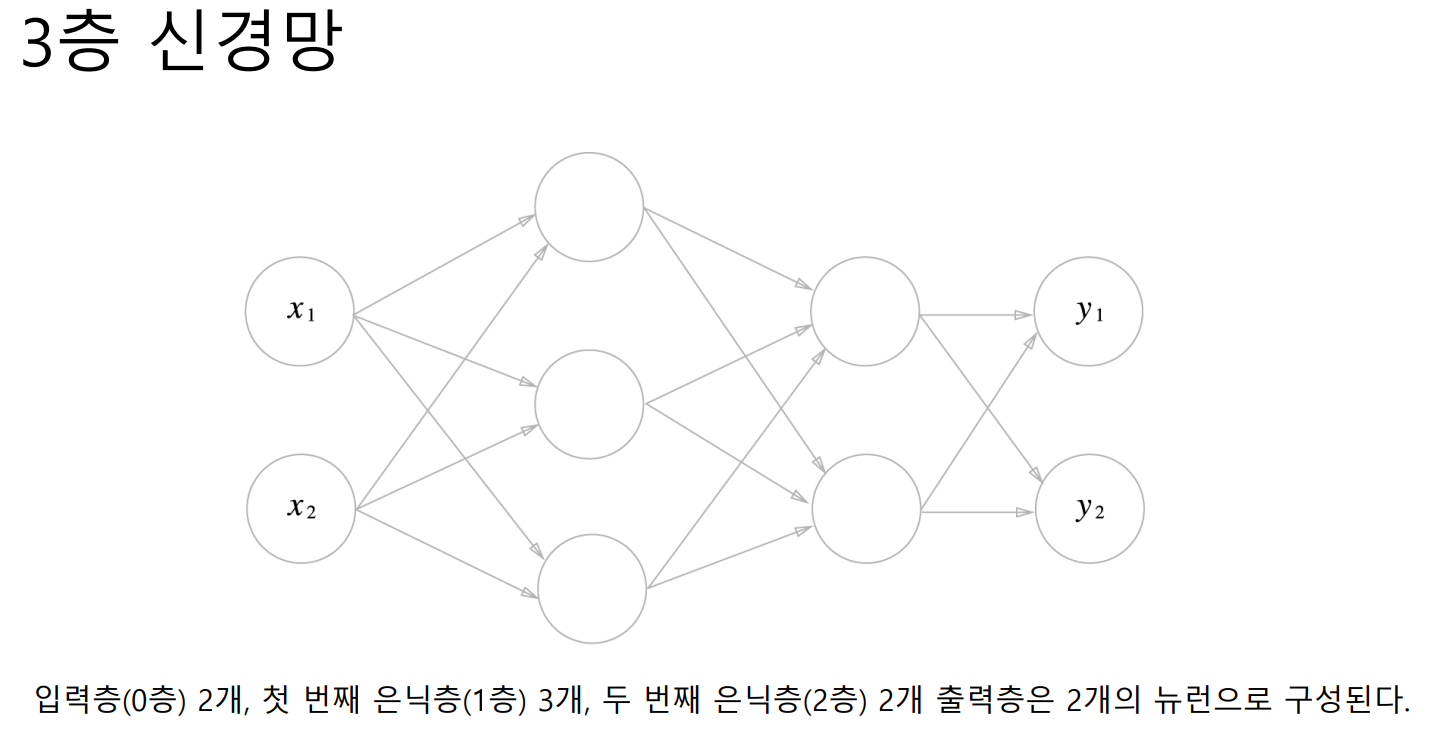

##### 출력층 계산하기
* 신경망은 분류와 회귀 모두에 이용할 수 있다
* 다만 둘 중 어떤 문제냐에 따라 출력층에서 사용하는 활성화 함수가 다라진다
* 일반적으로 회귀에는 항등함수(identity func)를
* 분류에는 소프트맥스 함수(softmax func)를 쓴다


##### 표기법 설명

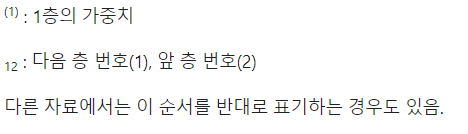

##### 표기법 설명

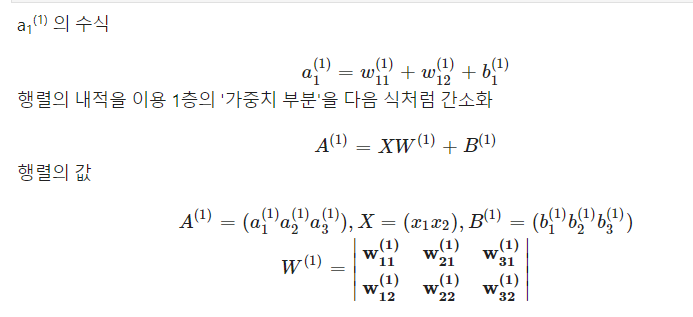

입력층에서 1층으로 신호 전달

In [29]:
# 1층 3개짜리 구현하기
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)     # (2, 3)
print(B1.shape)     # (3,)
print(X.shape)      # (2,)

A1 = np.dot(X, W1) + B1

(2, 3)
(3,)
(2,)


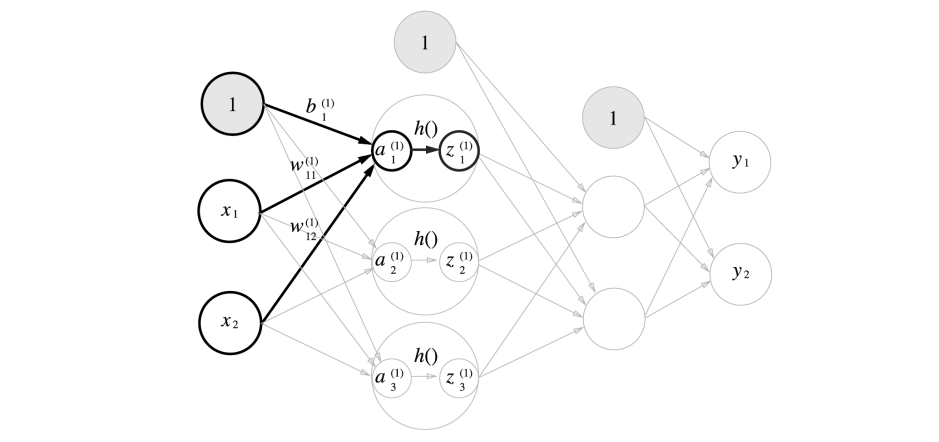

* 은닉층에서의 가중치 합을 a로 표기하고
* 활성화 함수 h()로 변환된 신호를 z로 표기

In [30]:
Z1 = sigmoid(A1)
print(A1)
print(Z1) 

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


1층에서 2층으로 신호 전달

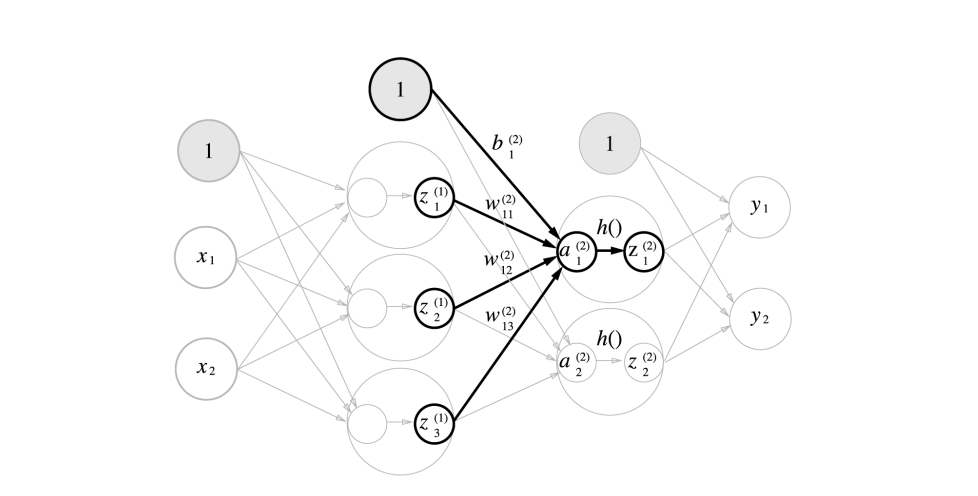

In [31]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape) # (3,)
print(W2.shape) # (3, 2)
print(B2.shape) # (2,)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

(3,)
(3, 2)
(2,)


2층에서 출력층으로 신호 전달
* 지금까지와는 다르게 활성화 함수 h()와 항등함수(identity function)를 활성화 함수로 이용한다

In [33]:
def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3) # 혹은 Y = A3